In [1]:
# NAPOMENA: Predikcija za unete atribute je vrlo LOSA jer gradiejntni spust
# pronalazi koeficijente w_i nad skaliranim atributima. Iako se uneti atributi skaliraju
# pomocu zabelezenih avg/stddev iz odgovarajucih kolona, ipak se (iz nekog razloga) dobija los rezultat
# (masi za nekih 8 mpg) !!!


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
def loss_function(X, y, w):
    N = y.shape[0]
    y_predict = X.dot(w)
    diff = y_predict - y
    
    gradient = np.zeros(w.shape[0])
    gradient = 1/N * (X.transpose().dot(diff))
    
    loss = 1/(2*N) * np.sum(diff ** 2)
    
    return loss, gradient

In [4]:
def gradient_descent(X, y, w, alpha=0.01, num_iter=100, eps=10e-5):
    loss_history = np.zeros((num_iter, 1))
    it_break = num_iter
    
    for i in range(num_iter):
        loss, gradient = loss_function(X, y, w)        
        w = w - alpha * gradient
        
        loss_history[i] = loss
        # print(f'Iteration {i + 1}: Loss = {loss}')
        
        if i > 0 and np.abs(loss - loss_history[i-1]) <= eps:
            it_break = i
            break
    
    return w, loss_history, it_break

In [5]:
def show_model(model):
    n = model.shape[0]
    
    print('f_w(x) = ', end='')
    for i in range(n):
        if i == 0:
            print(f'{round(model[i][0], 3)} + ', end='')
        elif i < n - 1:
            print(f'{round(model[i][0], 3)}*x{i-1} + ', end='')
        else:
            print(f'{round(model[i][0], 3)}*x{i-1}', end='')
    
    print()       

In [6]:
def predict(model, instance):
    return model.transpose().dot(instance)[0][0]

In [7]:
df = pd.read_csv('../datasets/auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [8]:
df = df.replace('?', np.nan)
df = df.dropna()

In [9]:
y = df['mpg']
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [10]:
X = df.drop('mpg', axis=1)
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model-year
0,8,307.0,130.0,3504,12.0,70
1,8,350.0,165.0,3693,11.5,70
2,8,318.0,150.0,3436,11.0,70
3,8,304.0,150.0,3433,12.0,70
4,8,302.0,140.0,3449,10.5,70


In [ ]:
N = y.shape[0]
print(f'Broj instanci: {N}')

Broj instanci: 396


In [ ]:
m = X.shape[1]
print(f'Broj atributa: {m}')

Broj atributa: 6


In [ ]:
attributes = list(df.drop('mpg', axis=1).columns.values)
print(attributes)

['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model-year']


In [14]:
y = np.array(y)

avg = np.average(y)
stddev = np.max(y) - np.min(y)

y = np.array(list(map(lambda x: (x - avg) / stddev, y))).reshape(-1, 1)
print(y)

[[-1.46733290e-01]
 [-2.26520524e-01]
 [-1.46733290e-01]
 [-1.99924780e-01]
 [-1.73329035e-01]
 [-2.26520524e-01]
 [-2.53116269e-01]
 [-2.53116269e-01]
 [-2.53116269e-01]
 [-2.26520524e-01]
 [-2.26520524e-01]
 [-2.53116269e-01]
 [-2.26520524e-01]
 [-2.53116269e-01]
 [ 1.28411777e-02]
 [-4.03503116e-02]
 [-1.46733290e-01]
 [-6.69460563e-02]
 [ 9.26284118e-02]
 [ 6.60326671e-02]
 [ 3.94369224e-02]
 [ 1.28411777e-02]
 [ 3.94369224e-02]
 [ 6.60326671e-02]
 [-6.69460563e-02]
 [-3.59499248e-01]
 [-3.59499248e-01]
 [-3.32903503e-01]
 [-3.86094992e-01]
 [ 9.26284118e-02]
 [ 1.19224156e-01]
 [ 3.94369224e-02]
 [-1.20137546e-01]
 [-1.99924780e-01]
 [-1.73329035e-01]
 [-1.20137546e-01]
 [-1.46733290e-01]
 [-2.53116269e-01]
 [-2.53116269e-01]
 [-2.53116269e-01]
 [-2.53116269e-01]
 [-3.06307758e-01]
 [-2.79712014e-01]
 [-2.79712014e-01]
 [-1.46733290e-01]
 [-4.03503116e-02]
 [-1.20137546e-01]
 [-1.46733290e-01]
 [-1.37545669e-02]
 [ 1.19224156e-01]
 [ 1.72415646e-01]
 [ 1.72415646e-01]
 [ 1.9901139

In [ ]:
X = np.ones((N, m + 1))
scale_mapping = {}

for i in range(m):
    attr_i = df.iloc[:, i]
    avg = np.average(attr_i)
    stddev = np.max(attr_i) - np.min(attr_i)
    
    scale_mapping[str(i)] = (avg, stddev)
    X[:, i + 1] = np.array(list(map(lambda a: (a - avg) / stddev, attr_i)))

print('Podaci u numpy formatu:')
print(X)

Podaci u numpy formatu:
[[ 1.         -0.14673329  0.50858586 ...  0.14027503  0.15055288
  -0.21165524]
 [ 1.         -0.22652052  0.50858586 ...  0.33049242  0.2041395
  -0.24141715]
 [ 1.         -0.14673329  0.50858586 ...  0.24897069  0.13127304
  -0.27117905]
 ...
 [ 1.          0.22560714 -0.29141414 ... -0.10972497 -0.19223136
  -0.23546477]
 [ 1.          0.11922416 -0.29141414 ... -0.13689888 -0.09866742
   0.1812019 ]
 [ 1.          0.19901139 -0.29141414 ... -0.12059453 -0.07173235
   0.22882095]]


In [16]:
w_init = np.zeros((m + 1, 1))
print('Inicijalizacija w:')
print(w_init)

Inicijalizacija w:
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [29]:
alpha = 0.01
num_iter = 6500
eps = 10e-6

w, loss_history, it_break = gradient_descent(X, y, w_init, alpha, num_iter, eps)
print(loss_history)
print(f'Last iteration: {it_break}')

[[0.02165231]
 [0.02155243]
 [0.02145316]
 ...
 [0.        ]
 [0.        ]
 [0.        ]]
Last iteration: 395


In [ ]:
print(f'Trained model:')
show_model(w)

Trained model:
f_w(x) = 0.0 + 0.117*x0 + -0.119*x1 + -0.1*x2 + -0.076*x3 + -0.096*x4 + 0.029*x5


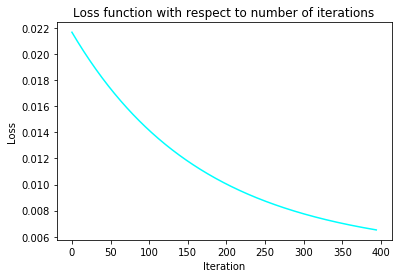

In [31]:
plt.plot(range(it_break), loss_history[:it_break, 0], color='aqua')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.title('Loss function with respect to number of iterations')
plt.show()

In [32]:
cylinders = int(input('Cylinders: '))
displacement = float(input('Displacement: '))
horsepower = float(input('Horsepower: '))
weight = float(input('Weight: '))
acceleration = float(input('Acceleration: '))
model_year = float(input('Model-year: '))

In [22]:
input_attrs = [cylinders, displacement, horsepower, weight, acceleration, model_year]
x = [1]
for i in range(m):
    x_i = input_attrs[i]
    (avg, stddev) = scale_mapping[str(i)]

    x_i_scaled = (x_i + avg) / stddev
    x.append(x_i_scaled)


In [ ]:
x = [1, cylinders, displacement, horsepower, weight, acceleration, model_year]
x = np.array(x).reshape(-1, 1)

print('Instance:')
print(x)

Instance:
[[1.000e+00]
 [8.000e+00]
 [3.550e+02]
 [1.600e+02]
 [3.515e+03]
 [1.150e+01]
 [7.000e+01]]


In [35]:
predicted_mpg = predict(w, x)
print(f'Mpg = {predicted_mpg}')
print(f'scaled mpg = {predicted_mpg* stddev + avg}')

Mpg = -323.6986212515555
scaled mpg = -5422.581028945325
